In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = "latin-1", header = None)
df = df[[0, 5]]
df.columns = ['polarity', 'text']
print(df.head())

   polarity                                               text
0         0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1         0  is upset that he can't update his Facebook by ...
2         0  @Kenichan I dived many times for the ball. Man...
3         0    my whole body feels itchy and like its on fire 
4         0  @nationwideclass no, it's not behaving at all....


In [5]:
df = df[df.polarity != 2]

df['polarity'] = df['polarity'].map({0:0, 4:1})
print(df['polarity'].value_counts())

polarity
0    800000
1    800000
Name: count, dtype: int64


In [6]:
def clean_text(text):
    return text.lower()

df['clean_text'] = df['text'].apply(clean_text)
print(df[['text', 'clean_text']].head())

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                          clean_text  
0  @switchfoot http://twitpic.com/2y1zl - awww, t...  
1  is upset that he can't update his facebook by ...  
2  @kenichan i dived many times for the ball. man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['polarity'], test_size = 0.2, random_state = 42)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1280000
Test size: 320000


In [8]:
vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (1, 2))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf =  vectorizer.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)
print("TF-IDF shape (test):", X_test_tfidf.shape)

TF-IDF shape (train): (1280000, 5000)
TF-IDF shape (test): (320000, 5000)


In [9]:
bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)

bnb_pred = bnb.predict(X_test_tfidf)

print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, bnb_pred))
print("\nBernoulliNB Classification report:", classification_report(y_test, bnb_pred))

Bernoulli Naive Bayes Accuracy: 0.766490625

BernoulliNB Classification report:               precision    recall  f1-score   support

           0       0.77      0.75      0.76    159494
           1       0.76      0.78      0.77    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



<Figure size 600x600 with 0 Axes>

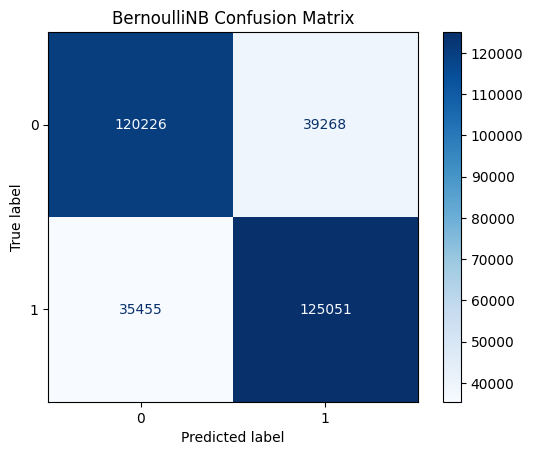

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm  = confusion_matrix(y_test, bnb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

plt.figure(figsize=(6, 6))
disp.plot(cmap = "Blues")
plt.title("BernoulliNB Confusion Matrix")
plt.show()

In [10]:
svm = LinearSVC(max_iter = 1000)
svm.fit(X_train_tfidf, y_train)

svm_pred = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\SVM Classification report:", classification_report(y_test, svm_pred))

SVM Accuracy: 0.795321875
\SVM Classification report:               precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [15]:
log_reg = LogisticRegression(max_iter = 100)
log_reg.fit(X_train_tfidf, y_train)

log_pred = log_reg.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\Logistic Regression Classification report:", classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.796084375
\Logistic Regression Classification report:               precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           1       0.79      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



In [16]:
sample_tweets = ["wtf!", "I hate that..", "It was okay, not great."]
sample_vec = vectorizer.transform(sample_tweets)

print("\nSample predictions:")
print("BernoulliNB:", bnb.predict(sample_vec))
print("SVM:", svm.predict(sample_vec))
print("Logistic Regression:", log_reg.predict(sample_vec))


Sample predictions:
BernoulliNB: [0 0 1]
SVM: [0 0 1]
Logistic Regression: [0 0 1]


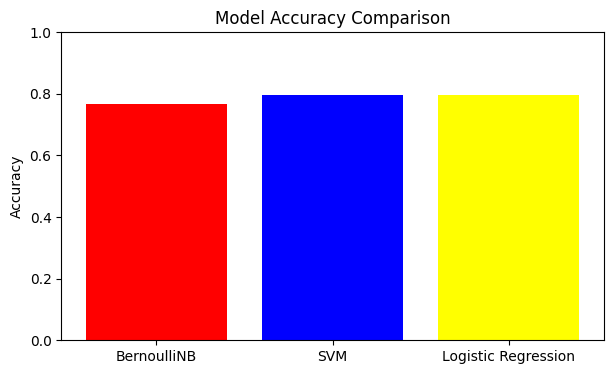

In [22]:
models = ["BernoulliNB", "SVM", "Logistic Regression"]

bnb_acc = accuracy_score(y_test, bnb_pred)
svm_acc = accuracy_score(y_test, svm_pred)
log_acc = accuracy_score(y_test, log_pred)
scores = [bnb_acc, svm_acc, log_acc]

colors = ["red", "blue", "yellow"]

plt.figure(figsize = (7, 4))
plt.bar(models, scores, color = colors)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()